In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from IPython.display import clear_output
import emcee
import corner
from itertools import permutations
from itertools import combinations 
from itertools import combinations_with_replacement

# Hidden Markov models

In [2]:
T=np.array([[0.8,0.2],[0.2,0.8]])
#Matriz de emisión
E=np.array([[0.5,0.9],[0.5,0.1]])

Obs=[1,0,0,0,1,0,1,0]
States=np.array([0,1])
Prior=np.array([0.2,0.8])

In [3]:
def GetStates(State,N):
    CStates = list(combinations_with_replacement(State,N))

    Permu = []

    for it in CStates:
      p = list(permutations(it,N))
      for i in p:
        if i not in Permu:
          Permu.append(i)

    CStates = np.array(Permu)

    return CStates

In [4]:
def GetProb(T,E,Obs,State,Prior):

  n = len(Obs)
  p = 1.
  p *= Prior[ State[0] ]

  for i in range(n-1): 
    p *= T[ State[i+1], State[i] ]

  for i in range(n):
    p *= E[ Obs[i], State[i] ]

  return p


In [5]:
HiddenStates = GetStates(States, len(Obs))
print("b. La secuencia oculta más probable es ")
HiddenStates

b. La secuencia oculta más probable es 


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [6]:
P = np.zeros(HiddenStates.shape[0])
for i in range(P.shape[0]):
    P[i] = GetProb(T, E, Obs, HiddenStates[i], Prior)
print("La secuencia oculta más probable del tipo de moneda que se eligío en cadalanzamiento",P)

La secuencia oculta más probable del tipo de moneda que se eligío en cadalanzamiento [1.63840000e-04 7.37280000e-05 2.04800000e-06 1.84320000e-05
 2.04800000e-06 1.84320000e-05 1.84320000e-05 1.84320000e-05
 3.27680000e-05 1.47456000e-05 8.29440000e-06 3.68640000e-06
 9.21600000e-07 2.56000000e-08 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 3.68640000e-06 8.29440000e-06
 2.30400000e-07 2.07360000e-06 2.30400000e-07 3.31776000e-05
 8.29440000e-06 2.30400000e-07 2.07360000e-06 2.30400000e-07
 2.07360000e-06 3.31776000e-05 1.47456000e-05 4.09600000e-07
 3.68640000e-06 4.09600000e-07 3.68640000e-06 3.68640000e-06
 5.89824000e-05 2.65420800e-05 1.84320000e-07 1.65888000e-06
 7.37280000e-07 1.65888000e-06 9.33120000e-07 4.14720000e-07
 1.65888000e-06 4.60800000e-08 6.63552000e-06 1.65888000e-06
 9.33120000e-07 4.14720000e-07 1.03680000e-07 2.88000000e-09
 4.14720000e-07 1.49299200e-05 4.14720000e-07 3.73248000e-06
 6.63552000e-06 1.65888000e-06 9.33120000e-07 4.14720000e-07


In [7]:
P_norm = P / np.sum(P)

df = pd.DataFrame({'Secuencia': [''.join(map(str, state)) for state in HiddenStates], 'Probabilidad': P_norm})

df = df.sort_values(by='Probabilidad', ascending=False).reset_index(drop=True)

df['Probabilidad Acumulada'] = df['Probabilidad'].cumsum()

Secuencias_ocultas = df[df['Probabilidad Acumulada'] <= 0.2]

Secuencias_ocultas

,Secuencia,Probabilidad,Probabilidad Acumulada
0,11110000,0.098790,0.098790
1,00000000,0.084696,0.183486


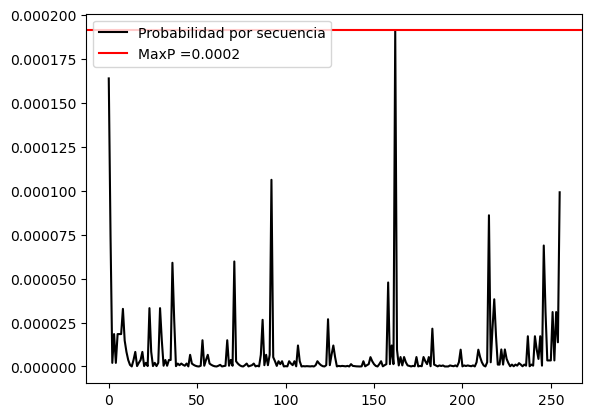

In [8]:
y_p=np.max(P)
plt.plot(P,color="k",label="Probabilidad por secuencia")
plt.axhline(y_p,color="red", label="MaxP ="+str(round(y_p,4)))
plt.plot()
plt.legend(fontsize=10)

In [9]:
P_0= np.zeros(len(set(Obs)))  

for i, seq in enumerate(HiddenStates):
    for t, obs_val in enumerate(Obs):
        P_0[obs_val] += P[i] * E[obs_val, seq[t]]

Po_normalized = P_0 / np.sum(P_0)

for obs_val, prob in enumerate(Po_normalized):
    print(prob)


0.7670064485634628
0.23299355143653722


In [10]:
from itertools import product

all_combinations = list(product([0, 1], repeat=8))

print(f"Total de combinaciones: {len(all_combinations)}")
OBS=[]
for obs in all_combinations:
    OBS.append(obs)

OBS=np.array(OBS)

Total de combinaciones: 256


In [11]:
HiddenStates = GetStates(States, len(OBS[0]))
HiddenStates

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [12]:
P = np.zeros(HiddenStates.shape[0])
for i in range(P.shape[0]):
    P[i] = GetProb(T, E, OBS[i], HiddenStates[i], Prior)

P_total=np.sum(P/np.sum(P))

print("Los estados de muestreo estan bien definidos, ya que al suma de todas las probabilidades es: ", P_total)

Los estados de muestreo estan bien definidos, ya que al suma de todas las probabilidades es:  1.0


**¿El resultado depende de la probabilidad a-priori?**  

La probabilidad a priori  $P(S_0)$ describe nuestra creencia inicial sobre el estado oculto $S_0$ antes de observar cualquier dato. Este modelo se utiliza como punto de partida para los siguientes calculos de las probabilidades conjuntas de las secuencias ocultas y observables, para ello se desarrolla el siguiente procedimiento:  
  
$P(S, \Omega_O) = P(S_0) \cdot P(S_1 \mid S_0) \cdot \ldots \cdot P(S_n \mid S_{n-1}) \cdot P(\Omega_O \mid S)$

Como se logra observar  $P(S_0)$ influye directamente en el valor de la probabilidad conjunta, lo que afecta a todas las secuencias posteriores, ya que se le da mayor peso en un inicio a el estado $1$ o $0$. Sin embargo, al calcular todas las posibles combinaciones, se diluye el impacto de  $P(S_0)$, puesto que se poseen todos los $\Omega_0$ posibles. 

**¿Qué enfoque metodológico basado en datos propondría?**  

Implementaria una red neuronal, ya que estas pueden aprender representaciones complejas de las relaciones entre los estados, en el caso de los Hidden models, el objetivo consiste en aprender a mapear secuencias de observaciones a secuencias de estados ocultos y, luego, de esas secuencias, estimar las probabilidades de transición y emisión.

# Maxwell-Boltzmann distribution

In [13]:
ruta="Maxwell.txt"
data = pd.read_csv(ruta)
x_data=data["Velocidad"]

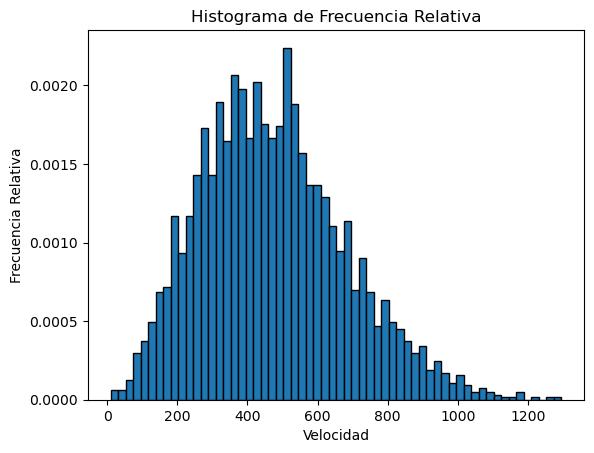

In [14]:
n = 60
plt.hist(x_data, bins=n, density=True, edgecolor='black')
plt.title("Histograma de Frecuencia Relativa")
plt.xlabel("Velocidad")
plt.ylabel("Frecuencia Relativa")
plt.show()

In [15]:
counts, edges = np.histogram(x_data, bins=n, density=True)

Ancho = edges[1] - edges[0]

centro = edges[:-1] + Ancho / 2

Vel_prom = np.sum(centro * counts * Ancho)

print(f"El valor promedio empírico de la velocidad es: {Vel_prom:.4f}")

El valor promedio empírico de la velocidad es: 472.1540


In [16]:
M=0.028
K_b=8.31
def maxwell_boltzmann(v,T,m=M,k_b=K_b):
    factor = (m / (2 * np.pi * k_b * T))**(3/2)
    return factor * 4 * np.pi * v**2 * np.exp((-m * v**2) / (2 * k_b * T))


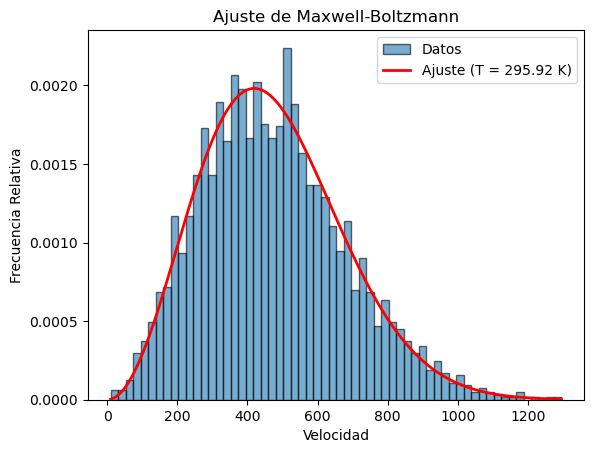

In [17]:
n_bins = 60
counts, edges = np.histogram(x_data, bins=n_bins, density=True)
bin_centers = edges[:-1] + (edges[1] - edges[0]) / 2

popt, _ = curve_fit(maxwell_boltzmann, bin_centers, counts, p0=[300])

v_fit = np.linspace(min(x_data), max(x_data), 1000)
fit_curve = maxwell_boltzmann(v_fit, *popt)

plt.hist(x_data, bins=n_bins, density=True, edgecolor='black', alpha=0.6, label="Datos")
plt.plot(v_fit, fit_curve, color='red', lw=2, label=f"Ajuste (T = {popt[0]:.2f} K)")
plt.title("Ajuste de Maxwell-Boltzmann")
plt.xlabel("Velocidad")
plt.ylabel("Frecuencia Relativa")
plt.legend()
plt.show()

In [18]:
R = 8.314 #Constante de los gases
T=popt[0]

#Velocidad más probable
v_p=np.sqrt((2*R*T)/M)
print("La velocidad más probable es de: ",v_p)

#Velocidad promedio
v_m=(2/np.sqrt(np.pi))*v_p
print("La velocidad promedio es de: ",v_m)

#Diferencia con el empírico
diff=np.abs(Vel_prom-v_m)
print("La diferencia con el empírico es:", diff)

#Velocidad cuadrática
v=np.sqrt((3*R*T)/M)
print("La velocidad cuadrática es: ",v)

La velocidad más probable es de:  419.20670458014075
La velocidad promedio es de:  473.0241121549938
La diferencia con el empírico es: 0.8701504471683847
La velocidad cuadrática es:  513.4212614874964


**¿Difiere mucho del empírico?**  

La diferencia con el valor empírico es como y difiere por $< 1$, por ende se analiza que mediante la distribución de los datos se puede determinar una velocidad promedio muy cercana a la teórica

In [19]:
def Metropolis(Likelihood, p, x0=0, a=1, NSteps=int(2e4), burned=1000):
    x = np.zeros(NSteps)
    x[0] = x0
    accept = 0

    for i in range(NSteps - 1):
        p0 = Likelihood(x[i], *p)

        xn1 = x[i] + a * np.random.uniform(-1, 1)
        if xn1 <= 0:  
            xn1 = 1e-6

        p1 = Likelihood(xn1, *p)

        alpha = np.minimum(1, p1 / p0) if p0 > 0 else 0
        g = np.random.rand()

        if g < alpha:
            x[i + 1] = xn1
            accept += 1
        else:
            x[i + 1] = x[i]

        if i % 200 == 0:
            clear_output(wait=True)
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plt.plot(x[:i + 1], '-', color='k')
            plt.xlabel('Paso')
            plt.ylabel('Valor de x')
            plt.title('Evolución de la cadena')

            plt.subplot(1, 2, 2)
            _x = np.linspace(np.min(x), np.max(x), 300)
            plt.plot(_x, Likelihood(_x, *p), color='r', label='T=297.89 K')
            plt.hist(x[:i + 1], bins=40, density=True, color='b', alpha=0.6)
            plt.xlabel('x')
            plt.ylabel('Densidad')
            plt.legend()
            plt.title('Distribución')
            plt.show()

    return x[burned:]  

In [20]:
T = 300 
x0 = 500  
NSteps = int(2e4)  
burned = 2000 
a = 50  

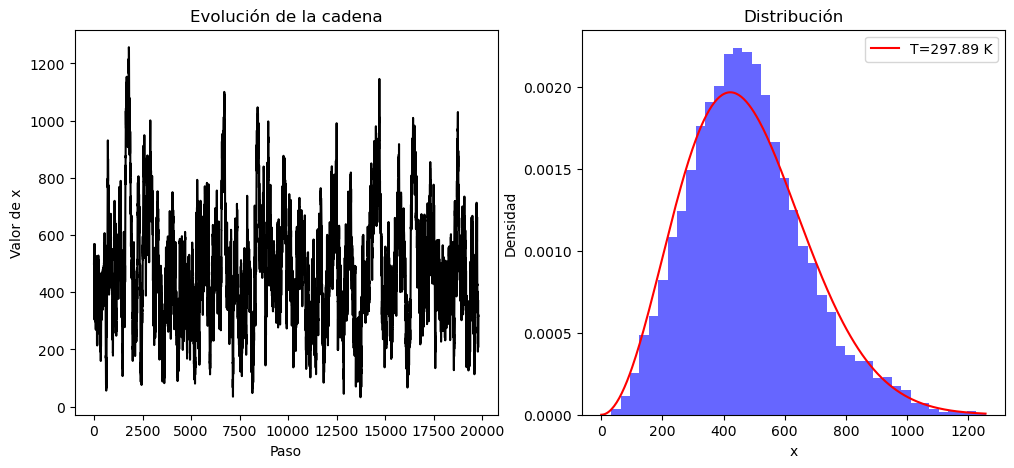

In [21]:
samples= Metropolis(maxwell_boltzmann, p=[T], x0=x0, a=a, NSteps=NSteps, burned=burned)

In [22]:
mean_estimate = np.mean(samples)
std_estimate = np.std(samples)
std_error = std_estimate / np.sqrt(len(samples))
print(f"Error estándar: {std_error:.4f}")

Error estándar: 1.3716


# MODELOS EXCLUIDOS

In [23]:
# Supongamos que T_0 es el valor de la temperatura bajo la hipótesis nula
T_0 = 300  # Por ejemplo

# Calcular el intervalo de confianza del 95% para T
lower_bound = np.percentile(samples, 0)
upper_bound = np.percentile(samples, 95)

# Imprimir el intervalo de confianza
print(f"Intervalo de confianza del 95% para T: ({lower_bound}, {upper_bound})")

# Evaluación de la hipótesis
if T_0 < lower_bound or T_0 > upper_bound:
    print(f"Se rechaza la hipótesis nula. T_0 = {T_0} está excluido.")
else:
    print(f"No se rechaza la hipótesis nula. T_0 = {T_0} está dentro del intervalo de confianza.")


Intervalo de confianza del 95% para T: (33.1867784235081, 808.1784055998926)
No se rechaza la hipótesis nula. T_0 = 300 está dentro del intervalo de confianza.


# BOSON DE HIGGS

In [48]:
ruta_H="HiggsFitting.csv"
data_H = pd.read_csv(ruta_H)
higgs=data_H["Higgs"]

<function matplotlib.pyplot.legend(*args, **kwargs)>

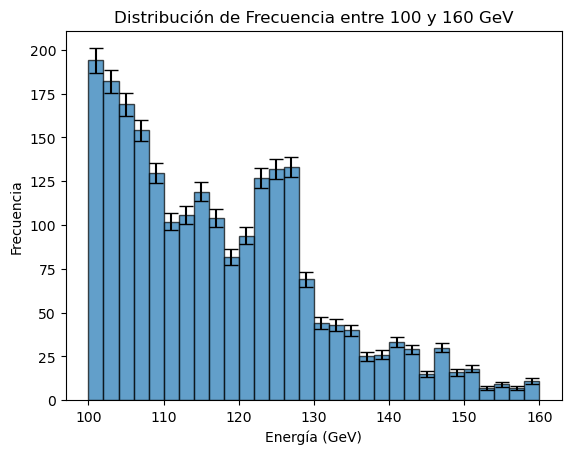

In [49]:
x_data = np.array(higgs[(higgs >= 100) & (higgs <= 160)])

n_bins = 30
HSignalBkg, centro = np.histogram(x_data, bins=n_bins, range=(100, 160), density=False)

bin_centers = 0.5 * (centro[:-1] + centro[1:])

plt.bar(bin_centers, HSignalBkg, width=(centro[1] - centro[0]), edgecolor='black', alpha=0.7, label='Frecuencia')

yerr = 0.5 * np.sqrt(HSignalBkg)
plt.errorbar(bin_centers, HSignalBkg, yerr=yerr, fmt='none', ecolor='k', capsize=5)
plt.title("Distribución de Frecuencia entre 100 y 160 GeV")
plt.xlabel("Energía (GeV)")
plt.ylabel("Frecuencia")
plt.legend

In [50]:
def log_verosimilitud_negativa(alpha,x_data):
    if alpha <= 0:  
        return np.inf
    n = len(x_data)
    return n * np.log(alpha) + np.sum((x_data - 100) / alpha)

bounds = [(0, 50)]
resultado = minimize(log_verosimilitud_negativa, x0=[1], args=(x_data,), bounds=bounds)
alpha_inicial=resultado.x[0]


In [51]:
def ajustar_alpha_inicial(alpha_inicial, iteraciones=10, tolerancia=1e-5):
    alpha_actual = alpha_inicial
    for i in range(iteraciones):
        resultado = minimize(
            log_verosimilitud_negativa, 
            x0=[alpha_actual], 
            args=(x_data,),
            bounds=[(0, 50)]
        )
        nuevo_alpha = resultado.x[0]
        alpha_actual = nuevo_alpha

    return alpha_actual

In [52]:
alpha_opt = ajustar_alpha_inicial(alpha_inicial)
print(f"El parámetro óptimo refinado es α = {alpha_opt:.4f}")

El parámetro óptimo refinado es α = 17.6189


In [53]:
def Expo(alpha, x):
    return 1 / alpha * np.exp(-(x - 100) / alpha)

In [54]:
x_model = np.linspace(100, 160, 500)  # Rango continuo para el modelo
y_model = Expo(alpha_opt, x_model)

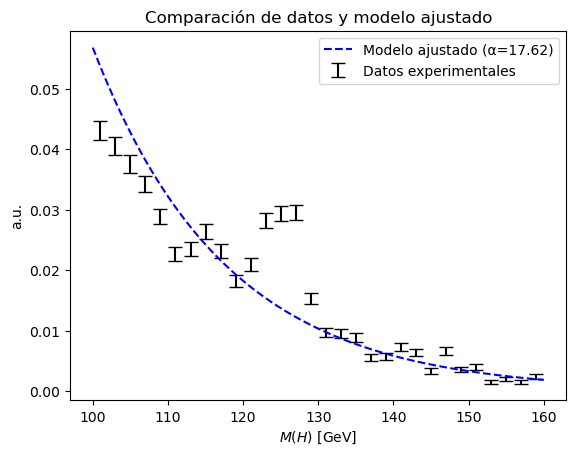

In [55]:
n_bins = 30
HSignalBkg, centro = np.histogram(x_data, bins=n_bins, range=(100, 160), density=True)
bin_centers = 0.5 * (centro[:-1] + centro[1:]) 
bin_width = centro[1] - centro[0]
yerr = 0.5 * np.sqrt(HSignalBkg / (len(x_data) * bin_width))

plt.errorbar(bin_centers, HSignalBkg, yerr=yerr, fmt='', linestyle='',ecolor='black', capsize=5, label='Datos experimentales', color='black')

x_model = np.linspace(100, 160, 500)  
y_model = Expo(alpha_opt, x_model)  
plt.plot(x_model, y_model, color='blue', linestyle='--', label=f'Modelo ajustado (α={alpha_opt:.2f})')

plt.title("Comparación de datos y modelo ajustado")
plt.xlabel("$M(H)$ [GeV]")
plt.ylabel("a.u.")
plt.legend()
plt.show()

In [56]:
def hipotesis_alternativa(A,miu,sigma,alpha,x):
    primero=A*(1/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-(x-miu)**2/(2*sigma**2))
    segunda=(1-A)*(1/alpha)*np.exp(-(x-100)/alpha)
    return primero+segunda

In [57]:
def conjunta_verosimilitud(params, x):
    A, miu, sigma, alpha = params  
    if A <= 0 or A > 1 or sigma <= 0 or alpha <= 0:  
        return np.inf
    return -np.sum(np.log(hipotesis_alternativa(A, miu, sigma, alpha, x)))

In [58]:
bounds = [(0, 1), (50, 500), (1, 100), (1, 100)]

n_iteraciones = 1000  
resultados = []
for _ in range(n_iteraciones):
    x0 = [np.random.uniform(low, high) for low, high in bounds]
    resultado = minimize(conjunta_verosimilitud, x0=x0, args=(x_data,), bounds=bounds, method='L-BFGS-B')
    resultados.append((resultado.fun, resultado.x)) 

mejor_resultado = min(resultados, key=lambda x: x[0])
mejor_valor_objetivo, mejor_parametros = mejor_resultado

print("Parámetros óptimos:")
print(f"A = {mejor_parametros[0]:.4f}")
print(f"miu = {mejor_parametros[1]:.4f}")
print(f"sigma = {mejor_parametros[2]:.4f}")
print(f"alpha = {mejor_parametros[3]:.4f}")

c:\Users\aleja\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\aleja\AppData\Local\Temp\ipykernel_10688\4115085610.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(hipotesis_alternativa(A, miu, sigma, alpha, x)))


Parámetros óptimos:
A = 0.1421
miu = 125.1983
sigma = 2.7754
alpha = 16.3633


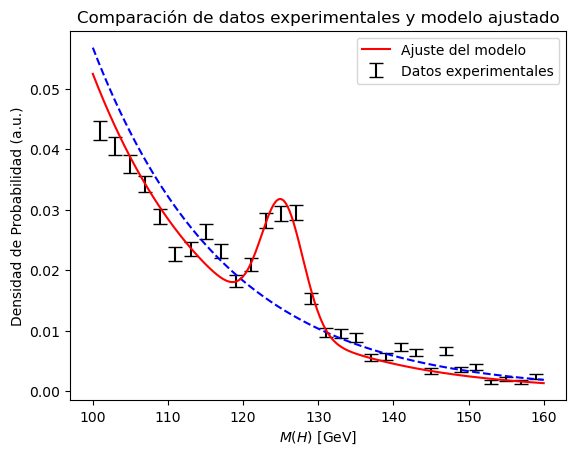

In [59]:
A_opt, miu_opt, sigma_opt, alpha_opt = mejor_parametros

y_ajustado = hipotesis_alternativa(A_opt, miu_opt, sigma_opt, alpha_opt, x_model)

plt.errorbar(bin_centers, HSignalBkg, yerr=yerr, fmt='', linestyle='', ecolor='black', capsize=5, label='Datos experimentales', color='black')

plt.plot(x_model, y_model, color='blue', linestyle='--')

plt.plot(x_model, y_ajustado, color='red', label='Ajuste del modelo')

plt.title("Comparación de datos experimentales y modelo ajustado")
plt.xlabel("$M(H)$ [GeV]")
plt.ylabel("Densidad de Probabilidad (a.u.)")
plt.legend()
plt.show()


In [89]:
desv=np.linalg.norm(-2*np.log(hipotesis_alternativa(A_opt, miu_opt, sigma_opt, alpha_opt,x_model)/Expo(alpha_opt,x_model)))
desv

13.235715678538906

In [90]:
n=len(hipotesis_alternativa(A_opt, miu_opt, sigma_opt, alpha_opt,x_model))
sigma_vida_media=desv/n
sigma_vida_media

0.026471431357077812

In [120]:
h_barra=1.015e-23
t=h_barra/sigma_vida_media
valor_real=1.56e-22
print("La vida media estimada para le Boson de Higgs es de: ",t,"mientras que la real corresponde a: ",valor_real,"por lo cual se observa que el calculo se encuentra en el mismo orden de magnitud")

La vida media estimada para le Boson de Higgs es de:  3.834322316419108e-22 mientras que la real corresponde a:  1.56e-22 por lo cual se observa que el calculo se encuentra en el mismo orden de magnitud


In [103]:
def LogPrior(p):
    A, mu, sigma, alpha = p
    if 0. < A < 1. and 100. <= mu <= 300. and 0.1 <= sigma <= 20. and 1 <= alpha <= 50:
        return 0.
    else:
        return -np.inf

In [104]:
def Boson_higgs(p, x):
    A, mu, sigma, alpha = p
    prob = hipotesis_alternativa(A, mu, sigma, alpha, x)
    return np.maximum(prob, 1e-10)  # Asegura que la probabilidad sea siempre positiva y mayor a un límite inferior.


In [105]:
def Likelihood(p, x):
    prob = Boson_higgs(p, x)
    return np.maximum(prob, 1e-10)  

In [ ]:
def JointLikelihood(p, x):
    likelihoods = Likelihood(p, x)
    log_likelihoods = np.log(likelihoods)
    if not np.all(np.isfinite(log_likelihoods)):  
        return -np.inf
    return np.sum(log_likelihoods)


In [107]:
JointLikelihood(mejor_parametros,x_model)

-2320.8201510174804

In [ ]:
def LogPosterior(p, x):
    LogP = LogPrior(p)
    if not np.isfinite(LogP):  
        return -np.inf
    
    LogL = JointLikelihood(p, x)
    if not np.isfinite(LogL):  
        return -np.inf
    
    return LogP + LogL


In [109]:
LogPosterior(mejor_parametros,x_data)

-8589.55902872577

In [ ]:
n_walkers, n_params = 20, 4  # 20 caminantes y 4 parámetros
p0 = np.random.uniform([0.1, 150, 1.0, 5], [0.9, 250, 10.0, 30], size=(n_walkers, n_params))
sampler = emcee.EnsembleSampler(n_walkers, n_params, LogPosterior, args=(x_data,)) 
sampler.run_mcmc(p0, 10000, progress=True) 

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:50<00:00, 199.17it/s]


State([[1.27676153e-01 1.25274610e+02 2.38615273e+00 1.69824761e+01]
 [1.65646280e-01 1.24654343e+02 3.18833639e+00 1.63410808e+01]
 [9.12059573e-04 2.93446953e+02 3.25945192e+00 1.81160066e+01]
 [1.44489189e-01 1.25237058e+02 3.50230432e+00 1.71463886e+01]
 [1.41847145e-01 1.25624214e+02 2.79066163e+00 1.65448610e+01]
 [1.27640391e-01 1.24632559e+02 4.17451549e+00 1.70689442e+01]
 [1.54170547e-01 1.25127562e+02 2.65470746e+00 1.63995484e+01]
 [1.39580416e-01 1.25007507e+02 3.42477663e+00 1.66025163e+01]
 [1.42594844e-01 1.24862969e+02 3.07698176e+00 1.68840457e+01]
 [1.45911577e-01 1.24953367e+02 3.16147056e+00 1.63561788e+01]
 [1.87360232e-01 1.25185075e+02 4.50127445e+00 1.58762607e+01]
 [1.32326114e-01 1.25574524e+02 2.90049000e+00 1.59201127e+01]
 [1.40528884e-01 1.25524867e+02 2.77572005e+00 1.66413278e+01]
 [1.31157890e-01 1.25073936e+02 2.43651946e+00 1.71888510e+01]
 [1.38928939e-01 1.25426945e+02 3.79704104e+00 1.63714403e+01]
 [1.53336792e-01 1.25042522e+02 3.28818459e+00 1.

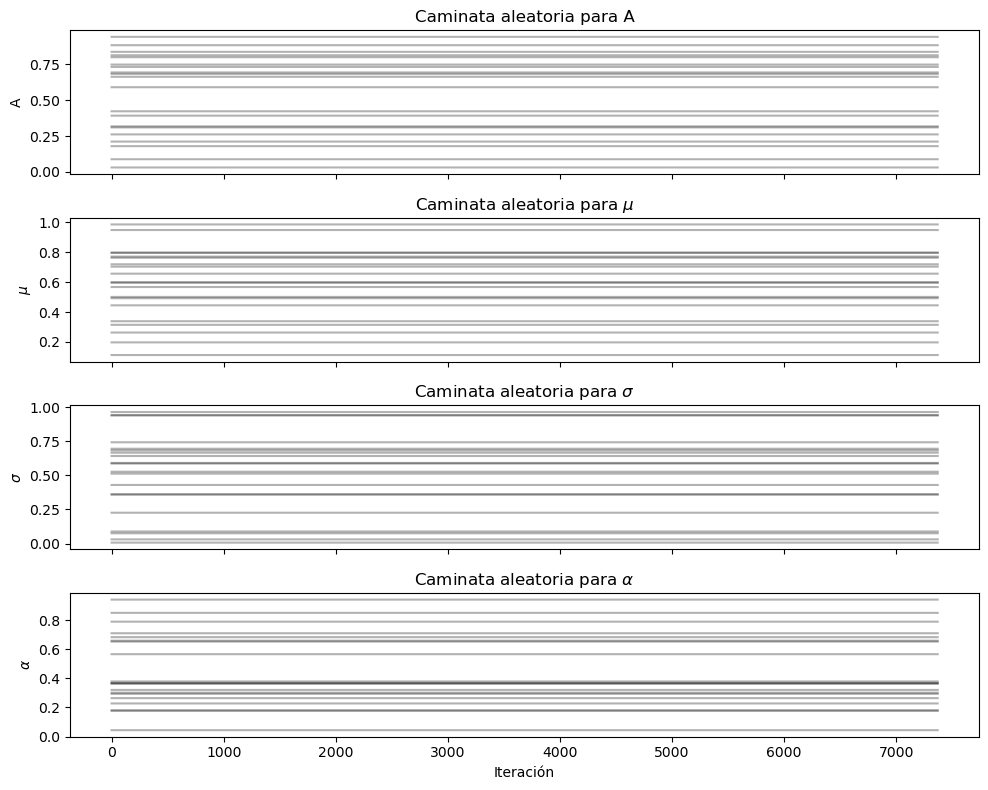

In [115]:
samples = sampler.get_chain()
labels = ["A", r"$\mu$", r"$\sigma$", r"$\alpha$"]  

fig, axes = plt.subplots(4, figsize=(10, 8), sharex=True)

for i in range(4):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)  
    ax.set_ylabel(labels[i])
    ax.set_title(f"Caminata aleatoria para {labels[i]}")

axes[-1].set_xlabel("Iteración")  
plt.tight_layout()  
plt.show()

